# JOBarcelona '23 | Data Science

### Contexto:
Somos un banco que dispone de una base de datos con una gran cantidad de información sobre nuestros clientes. Nuestro objetivo es ayudar a los analistas a predecir la tasa de abandono de estos clientes para así poder reducirla. La base de datos incluye información demográfica como la edad, el sexo, el estado civil y la categoría de ingresos. También contiene información sobre el tipo de tarjeta, el número de meses en cartera y los periodos inactivos. Además, dispone de datos clave sobre el comportamiento de gasto de los clientes que se acercan a su decisión de cancelación. Entre esta última información hay el saldo total renovable, el límite de crédito, la tasa media de apertura a la compra y métricas analizables como el importe total del cambio del cuarto trimestre al primero o el índice medio de utilización.

Frente a este conjunto de datos podemos capturar información actualizada que puede determinar la estabilidad de la cuenta a largo plazo o su salida inminente.

### Dataset

CLIENTNUM: Identificador único para cada cliente. (Integer)

Attrition_Flag: Indicador de si el cliente ha abandonado el banco o se queda (Boolean)

- Attrited Customer -> 0
- Existing Customer -> 1

Customer_Age: Edad del cliente. (Integer)

Gender: Sexo del cliente. (String)

Dependent_count: Número de personas a cargo que tiene el cliente. (Integer)

Education_Level: Nivel educativo del cliente. (String)

Marital_Status: Marital status of customer. (String)

Income_Category: Categoría de ingresos del cliente. (String)

Card_Category: Tipo de tarjeta del cliente. (String)

Months_on_book: El tiempo que el cliente ha estado en los libros. (Integer)

Total_Relationship_Count: Número total de relaciones que tiene el cliente con el proveedor de la tarjeta de crédito. (Integer)

Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses.(Integer)

Contacts_Count_12_mon: Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

Credit_Limit: Límite de crédito del cliente. (Integer)

Total_Revolving_Bal: Saldo renovable total del cliente. (Integer)

Avg_Open_To_Buy: Ratio medio de apertura a la compra del cliente. (Integer)

Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1. (Integer)

Total_Trans_Amt: Importe total de la transacción. (Integer)

Total_Trans_Ct: Recuento total de transacciones. (Integer)

Total_Ct_Chng_Q4_Q1: Recuento total cambiado del trimestre 4 al trimestre 1. (Integer)

Avg_Utilization_Ratio: Ratio de utilización media del cliente. (Integer)

Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses. (Integer)

Contacts_Count_12_mon: Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

Credit_Limit: Límite de crédito del cliente. (Integer)

Total_Revolving_Bal: Saldo rotativo total del cliente. (Integer)

Avg_Open_To_Buy: Ratio medio de apertura a compra del cliente. (Integer)

Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1. (Integer)

Total_Trans_Amt: Importe total de la transacción. (Integer)

Total_Trans_Ct: Recuento total de transacciones.. (Integer)

Total_Ct_Chng_Q4_Q1: Recuento total cambiado del trimestre 4 al trimestre 1. (Integer)

Avg_Utilization_Ratio: Ratio de utilización media del cliente. (Integer)

Para este desafío, tendrás que predecir el **Attrition_Flag**.

Hay dos archivos descargables:

**train.csv**: Son los datos descritos anteriormente que se utilizarán para entrenar el modelo. Descargar archivo de training

**test.csv**: Son los datos descritos anteriormente que se utilizarán en la predicción. Descargar archivo de testing

### Objetivo:
Crea un modelo predictivo de clasificación para poder clasificar los datos del archivo de testing. Primero entrena tu modelo con el conjunto de datos de training y una vez que tengas el modelo que maximice la puntuación **f1** (macro.) utiliza los datos de testing como entrada para tu modelo

# Submission:

### Archivo 1: predicciones.json:
Las predicciones deben estar en un archivo JSON llamado predictions.json, un ejemplo se puede encontrar en lo siguiente link.

En este fichero de predicciones, en formato json, cada fila corresponderá al valor predicho del **test_idx**, es decir, si el primer valor es un 2 significa que este 2 corresponde al primer fichero del conjunto de datos de prueba. Es **IMPORTANTE** llamar a la columna **target** tal y como se especifica en el formato. Recuerda que puedes utilizar la función **to_json** de pandas para convertir tu dataframe a json, la longitud de las predicciones tiene que ser la misma que en test.csv.

La puntuación de los objetivos vendrá de aplicar la puntuación f1 de las predicciones que hayas hecho al conjunto de datos de prueba con nuestra verdad fundamental.

IMPORTANTE: Las predicciones deben estar en formato int (0 o 1).

⚠️ CONDICIONES PARA QUE SU SOLUCIÓN SEA EVALUADA CORRECTAMENTE:

Su repositorio debe ser público.

Tu repositorio debe estar en la rama 'main'. Si creaste tu repo desde VSCode y tu rama principal superior es 'master'. Necesitas crear una rama llamada 'main' y mover todo a esta rama.

Dentro de tu repositorio debe estar el archivo 'predictions.json'.

Si tu enlace termina en '.git' quita el '.git' de la url y pégalo.

👍 Link correcto: https://github.com/CarlosIbCu/example_se

👎 Link incorrecto: https://github.com/CarlosIbCu/example_se.git

# Evaluación:
En la evaluación se tendrá en cuenta lo siguiente:

100/1200:(DOCUMENTACIÓN): Documentación aportada.

900/1200:(OBJETIVOS) Se obtendrá a partir de la f1-score(macro) del modelo predictivo. Comparación de las predicciones que su modelo ha hecho sobre frente a la verdad del terreno.

200/1200:(CALIDAD) Calidad y automatización del código, complejidad, mantenibilidad, fiabilidad y seguridad.

In [1]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import numpy as np

import missingno as msn 

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


import xgboost as xgb # XGBoost 



print("Setup Completed")

Setup Completed


In [2]:
# Read data
client_data_full = pd.read_csv("./supply_chain_train.csv", index_col="train_idx")
client_data_test_full = pd.read_csv("./supply_chain_test.csv", index_col="test_idx")

In [3]:
client_data_full.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [4]:
# Dropping "CLIENTNUM" feature since it does not provide relevant information
client_data_full.drop(columns="CLIENTNUM", axis=1, inplace=True)

In [5]:
# check for null values
client_data_full.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [6]:
client_data_full.shape

(8101, 20)

In [7]:
y = client_data_full["Attrition_Flag"]

In [8]:
features_cols = client_data_full.columns[:-1]

In [9]:
X_full = client_data_full[features_cols]

In [10]:
X_full.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
train_idx,,,,,,,,,,,,,,,,,,,
0,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464
1,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334
2,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103
3,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694
4,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708


In [11]:
# check data types
X_full.dtypes

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

At first glance there are no missing values. 

In [12]:
X_full.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
def find_unique_values(df):
    for i in df.columns:
        print("\nVariable: {}".format(i))
        print(df[i].unique())

In [14]:
find_unique_values(X_full)


Variable: Customer_Age
[54 58 45 34 49 60 43 52 30 33 29 57 28 38 44 32 46 47 35 55 39 48 50 51
 63 37 62 42 53 40 56 41 61 31 65 36 59 64 26 27 67 70 68 66]

Variable: Gender
['F' 'M']

Variable: Dependent_count
[1 4 2 0 3 5]

Variable: Education_Level
['Unknown' 'High School' 'Graduate' 'Doctorate' 'Post-Graduate'
 'Uneducated' 'College']

Variable: Marital_Status
['Single' 'Married' 'Divorced' 'Unknown']

Variable: Income_Category
['Unknown' 'Less than $40K' '$40K - $60K' '$60K - $80K' '$80K - $120K'
 '$120K +']

Variable: Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']

Variable: Months_on_book
[36 48 39 45 28 15 40 20 32 35 42 37 46 30 33 47 27 29 13 56 41 49 44 31
 50 25 34 26 38 43 23 55 24 21 51 22 52 54 18 19 53 17 16 14]

Variable: Total_Relationship_Count
[1 6 4 5 2 3]

Variable: Months_Inactive_12_mon
[3 4 1 2 5 6 0]

Variable: Contacts_Count_12_mon
[3 4 1 2 0 5 6]

Variable: Credit_Limit
[ 3723.  5396. 15987. ...  2314.  3563.  3858.]

Variable: Total_Revolving_Bal
[172

However, we see that some variables have "Unknown" values.

In [15]:
X_full["Income_Category"].value_counts(normalize=True)

Less than $40K    0.347118
$40K - $60K       0.179361
$80K - $120K      0.152697
$60K - $80K       0.138501
Unknown           0.109740
$120K +           0.072584
Name: Income_Category, dtype: float64

10.97% of all the values in the variable `Income_Category` are "*Unknown*". We cannot just drop those rows because we might loose useful information.  

In [16]:
unknown_count = (X_full=="Unknown")

Let's find out how many "Unknown" values do we have in each variable.

We'll treat the "Unknown" values as missing values.

In [17]:
# get only columns with unknown values
unknown_cols = unknown_count.sum().loc[(unknown_count.sum()>0)]

In [18]:
unknown_cols

Education_Level    1205
Marital_Status      579
Income_Category     889
dtype: int64

In [19]:
unknown_cols.index

Index(['Education_Level', 'Marital_Status', 'Income_Category'], dtype='object')

In [20]:
# Replace "Unknown" values with "NA"
X_full = X_full.replace("Unknown", np.nan)

In [21]:
find_unique_values(X_full)


Variable: Customer_Age
[54 58 45 34 49 60 43 52 30 33 29 57 28 38 44 32 46 47 35 55 39 48 50 51
 63 37 62 42 53 40 56 41 61 31 65 36 59 64 26 27 67 70 68 66]

Variable: Gender
['F' 'M']

Variable: Dependent_count
[1 4 2 0 3 5]

Variable: Education_Level
[nan 'High School' 'Graduate' 'Doctorate' 'Post-Graduate' 'Uneducated'
 'College']

Variable: Marital_Status
['Single' 'Married' 'Divorced' nan]

Variable: Income_Category
[nan 'Less than $40K' '$40K - $60K' '$60K - $80K' '$80K - $120K' '$120K +']

Variable: Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']

Variable: Months_on_book
[36 48 39 45 28 15 40 20 32 35 42 37 46 30 33 47 27 29 13 56 41 49 44 31
 50 25 34 26 38 43 23 55 24 21 51 22 52 54 18 19 53 17 16 14]

Variable: Total_Relationship_Count
[1 6 4 5 2 3]

Variable: Months_Inactive_12_mon
[3 4 1 2 5 6 0]

Variable: Contacts_Count_12_mon
[3 4 1 2 0 5 6]

Variable: Credit_Limit
[ 3723.  5396. 15987. ...  2314.  3563.  3858.]

Variable: Total_Revolving_Bal
[1728 1803 1648 ...  52

In [22]:
X_full.isna().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1205
Marital_Status               579
Income_Category              889
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<Axes: >

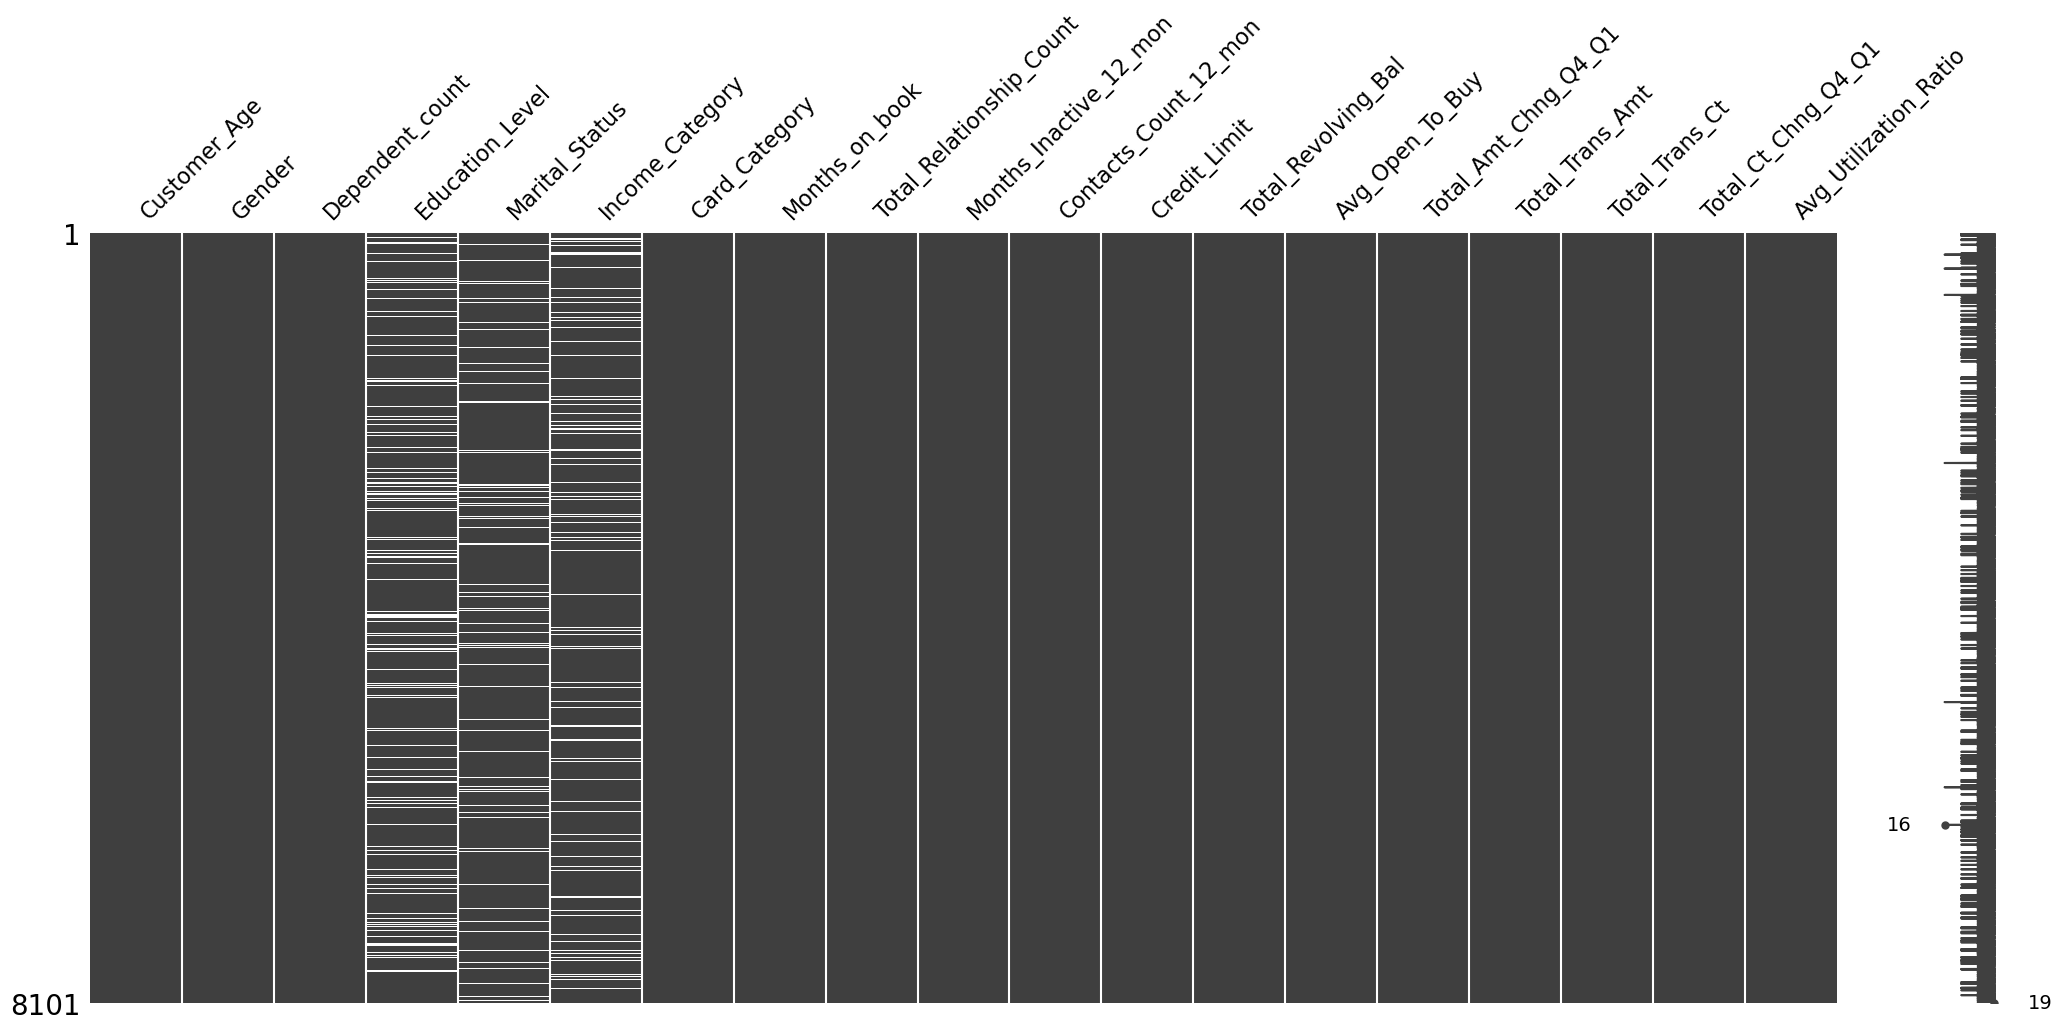

In [23]:
# plot features with missing values
msn.matrix(X_full)

In [24]:
# Break off validation set from training data.
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2, random_state=0)

In [25]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary).

categorical_cols = [col for col in X_train_full.columns if X_train_full[col].dtype in
 ["object"] and X_train_full[col].nunique() < 10]


In [26]:
# Select numerical columns.
numerical_cols = [col for col in X_train_full.columns if
 X_train_full[col].dtype in ["int64", "float64"]]

In [27]:
# how to ensure that all the cardinal values in X_valid_full will be encoded? By checking that the cardinal values in 
# X_valid_full are a subset of the cardinal values in X_train_full

good_categorical_cols = [col for col in categorical_cols if
                         set(X_valid_full[col]).issubset(set(X_train_full[col]))]



In [28]:
# keep selected columns only

my_cols = good_categorical_cols + numerical_cols
my_cols

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [29]:
# create a copy of X_train_full and X_valid_full taking only the selected columns. Assign each one to X_train
# and X_valid . Do the same for X_test .

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
# X_test
X_test = client_data_test_full[my_cols].copy()

In [30]:
X_train.head()


,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
train_idx,,,,,,,,,,,,,,,,,,,
6730,M,NaN,Married,Less than $40K,Blue,64,0,51,3,3,4,2787.0,1201,1586.0,0.372,1662,39,0.625,0.431
8,M,Graduate,Married,Less than $40K,Blue,30,0,36,3,3,2,2550.0,1623,927.0,0.650,1870,51,0.275,0.636
6919,F,Uneducated,Married,NaN,Blue,50,2,45,6,1,4,5660.0,2401,3259.0,0.779,1932,35,0.346,0.424
7624,F,High School,Single,Less than $40K,Blue,52,2,42,6,2,2,1438.3,869,569.3,0.821,4664,77,0.878,0.604
1891,M,Uneducated,Married,$80K - $120K,Blue,63,1,36,5,2,3,24571.0,1955,22616.0,1.174,1746,28,1.000,0.080


In [31]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("Impute", SimpleImputer(strategy="most_frequent")),
    ("Onehot", OneHotEncoder(handle_unknown="ignore")),
    ("Scaler", StandardScaler(with_mean=False))])

In [32]:
# Bundle preprocessing for numerical and categorical data.
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)])


In [33]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Customer_Age', 'Dependent_count',
                                  'Months_on_book', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('cat',
                                 Pipeline(steps=[('Impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Onehot',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('Scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['Gender', 'Education_Level', 'Marital_Status',
                                  'Income_Category', 'Card_Category'])])

In [34]:
# Build A Preliminary XGBoost
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=1)

In [35]:
# Create my_pipeline that includes the preprocessor and the model. Bundle preprocessing and modeling code in a
# pipeline.

# Classifier
my_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", clf_xgb)])


In [36]:
# Preprocessing of training data, fit model.

my_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [37]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)


In [38]:
X_valid.shape

(1621, 19)

In [39]:
len(preds)

1621

In [40]:
preds

array([1, 1, 1, ..., 1, 1, 1])

#  Generate test predictions

In [41]:
# generate predictions with the test data

preds_test = my_pipeline.predict(X_test)


In [42]:
preds_test

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
# check that the number of rows in predictions and X_test are the same.
X_test.shape, preds_test.shape

((2026, 19), (2026,))

In [49]:
X_test

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
test_idx,,,,,,,,,,,,,,,,,,,
0,F,Uneducated,Single,Less than $40K,Blue,48,3,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,M,Uneducated,Single,Less than $40K,Blue,59,1,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,F,Graduate,Divorced,Less than $40K,Blue,37,2,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,M,Doctorate,Divorced,$40K - $60K,Blue,47,3,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,M,Unknown,Single,$80K - $120K,Blue,42,3,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,M,Graduate,Single,$80K - $120K,Blue,34,2,29,3,1,3,13395.0,1678,11717.0,1.006,2650,69,0.865,0.125
2022,F,College,Single,Less than $40K,Blue,35,1,25,2,2,4,2231.0,1791,440.0,0.820,2576,42,0.750,0.803
2023,F,Uneducated,Divorced,Less than $40K,Blue,44,1,37,1,2,3,5594.0,1235,4359.0,0.549,5220,75,0.829,0.221


In [59]:
# Save results to a JSON file that can be submitted directly to the competition

outcome = pd.DataFrame({"target":preds_test})

In [64]:
outcome

,target
0,1
1,1
2,1
3,1
4,1
...,...
2021,1
2022,0
2023,1
2024,1


In [62]:
outcome.to_json("predictions.json")